In [29]:
%matplotlib inline

from IPython.display import display

# Packages for dimensionality reducti
from sklearn.decomposition import PCA
import numpy as np
from numpy.linalg import inv, eig

# Packages for  data processing and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import pandas_ta as ta

In [80]:
# max output width in numpy
np.set_printoptions(
    threshold=20,
    edgeitems=10,
    linewidth=140,
    formatter=dict(float=lambda x: "%.3g" % x),
)  # float arrays %.3g

# display setting for pandas
pd.options.display.max_columns = None
pd.options.display.expand_frame_repr = False
# Suppress Scientific Notation in Pandas
pd.options.display.float_format = "{:.4g}".format

In [3]:
dataset = pd.read_csv("Dow_adjcloses.csv")
dataset.set_index("Date", inplace=True)
dataset.shape

(4804, 30)

In [4]:
dataset.head()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.85,35.48,3.53,26.65,14.56,21.58,43.00,16.98,23.52,NaN,23.86,72.32,45.14,81.45,28.53,28.58,26.86,24.39,32.90,38.14,4.70,16.75,32.23,20.16,21.32,5.84,22.56,NaN,47.34,21.71
2000-01-04,28.66,34.13,3.23,26.61,14.37,21.58,40.58,17.04,24.90,NaN,23.41,67.76,40.51,78.68,27.19,27.54,26.28,23.89,31.74,36.85,4.45,16.12,31.60,19.89,20.45,5.77,21.83,NaN,45.57,20.91
2000-01-05,30.12,33.96,3.28,28.47,14.91,22.05,40.90,17.23,25.78,NaN,24.57,65.26,42.76,81.45,27.75,27.96,26.12,24.39,33.20,37.24,4.70,16.42,31.33,20.09,20.25,5.75,22.56,NaN,44.50,21.10
2000-01-06,31.88,33.96,3.00,28.55,15.46,22.90,39.78,17.21,24.90,NaN,25.96,67.35,41.55,80.05,25.82,28.70,26.49,23.93,33.26,35.99,4.68,16.97,32.44,20.12,21.00,5.96,22.45,NaN,45.13,20.53
2000-01-07,32.51,34.43,3.14,29.38,15.96,23.31,42.13,18.34,24.51,NaN,25.88,67.61,43.97,79.69,26.89,29.92,26.97,24.55,36.45,36.46,4.68,18.12,35.02,20.92,21.83,6.66,22.28,NaN,48.54,21.05


<Axes: >

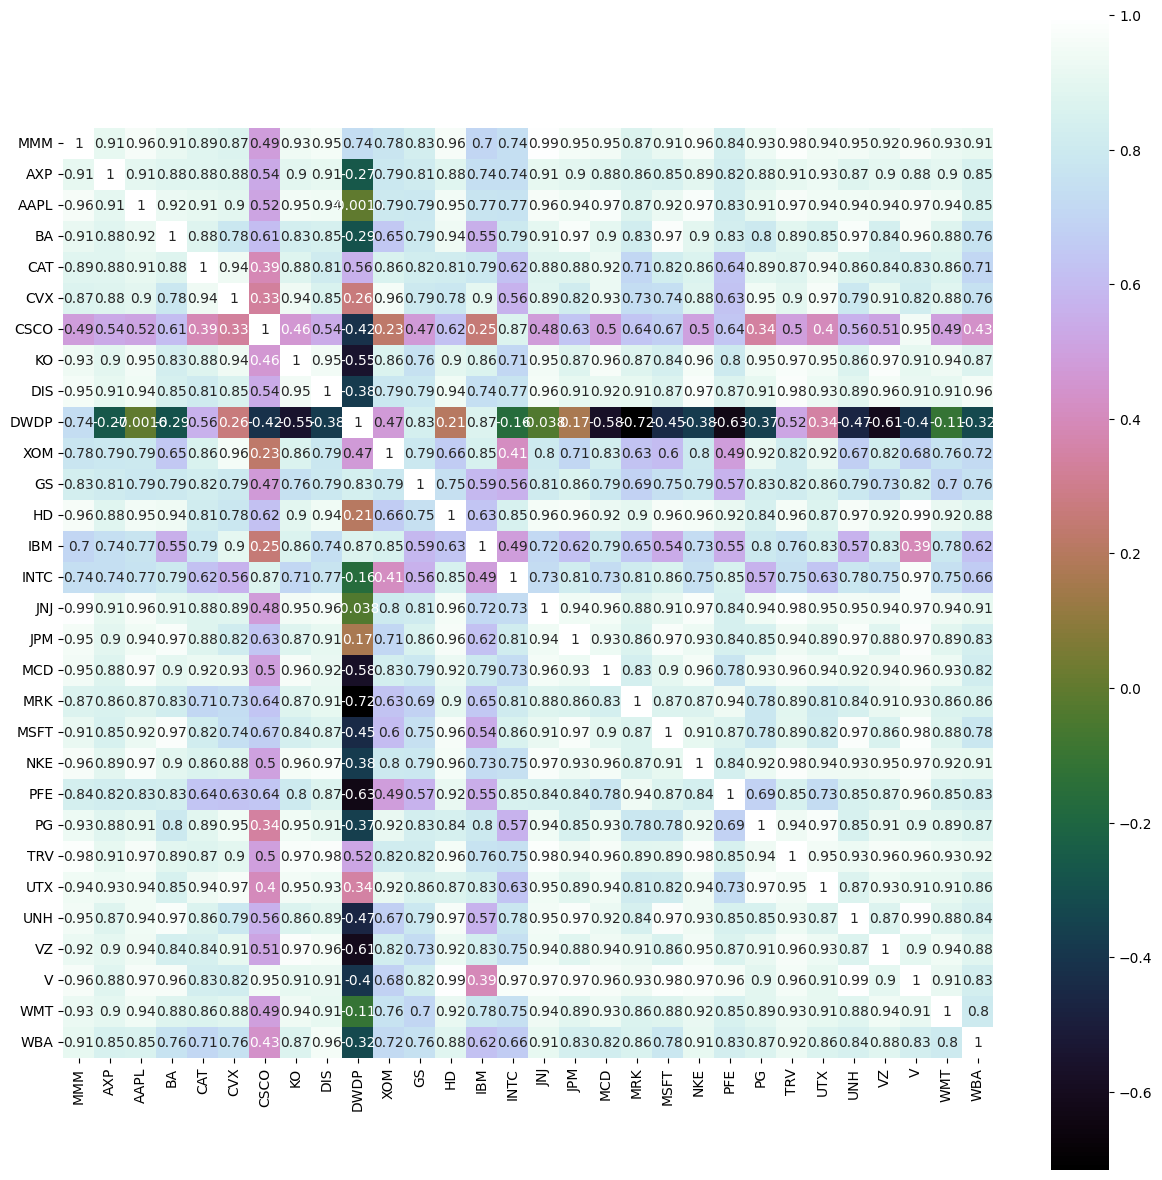

In [6]:
correlation = dataset.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap="cubehelix")

In [9]:
y = dataset.isnull()
z = y.sum()
z[z > 0]

DWDP    4441
V       2063
dtype: int64

In [16]:
missing_fractions = dataset.isnull().mean().sort_values(ascending=False)
missing_fractions.head()
drop_list = missing_fractions[missing_fractions > 0.3].index.values
dataset.drop(drop_list, axis=1, inplace=True)
dataset.shape

(4804, 28)

In [23]:
x = dataset.isnull().sum()
x[x > 0].index

Index([], dtype='object')

In [62]:
datareturns = dataset.pct_change(1).dropna()
with pd.option_context("display.float_format", "{:.4g}".format):
    display(datareturns.head())
    display(datareturns.describe())

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-04,-0.03973,-0.03784,-0.08433,-0.001493,-0.01295,0,-0.05643,0.003378,0.05857,-0.01915,-0.06296,-0.1026,-0.03397,-0.04667,-0.03666,-0.02168,-0.02069,-0.03519,-0.0338,-0.05445,-0.03733,-0.01959,-0.01333,-0.04096,-0.01284,-0.03237,-0.03742,-0.03711
2000-01-05,0.05098,-0.005122,0.01463,0.07002,0.03771,0.02164,0.007843,0.01099,0.03541,0.04973,-0.03698,0.05556,0.03516,0.02038,0.01554,-0.006208,0.02113,0.04598,0.01057,0.0578,0.01825,-0.008563,0.009828,-0.009343,-0.002262,0.03345,-0.02332,0.009091
2000-01-06,0.05827,0,-0.08654,0.002795,0.03654,0.03874,-0.02724,-0.001052,-0.0342,0.05655,0.03212,-0.02834,-0.01724,-0.06948,0.02628,0.0142,-0.01893,0.001905,-0.03348,-0.005194,0.03392,0.03551,0.001825,0.03671,0.03665,-0.005088,0.01401,-0.02703
2000-01-07,0.01984,0.01397,0.04737,0.02903,0.03254,0.01758,0.059,0.06579,-0.01581,-0.002935,0.003769,0.05833,-0.004386,0.04127,0.04257,0.01834,0.02572,0.09593,0.01309,0,0.06778,0.0797,0.03977,0.03964,0.1172,-0.007426,0.07552,0.02556
2000-01-10,-0.004864,0.01444,-0.01759,-0.01399,-0.03283,-0.02691,0.03683,-0.03193,0.1526,-0.01401,0.02204,-0.004882,0.03965,0.04573,-0.02528,-0.01718,0.004514,-0.02922,0.007268,0.01692,-0.001739,-0.00515,-0.0181,0.009844,-0.01729,-0.005271,-0.01825,0.02925


,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
count,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803
mean,0.0005032,0.0004748,0.001161,0.0007485,0.0006618,0.0004831,0.0003218,0.0003056,0.0005003,0.0003545,0.000479,0.0004845,0.0002399,0.0003913,0.0003928,0.0005834,0.0005169,0.000326,0.0003983,0.0007752,0.0003151,0.0003215,0.0005448,0.0005037,0.0009921,0.0003018,0.0002592,0.0003979
std,0.01446,0.02235,0.02579,0.01889,0.02026,0.01601,0.02462,0.01296,0.0188,0.0152,0.02337,0.01947,0.01629,0.0234,0.01203,0.0247,0.0145,0.0171,0.01927,0.01886,0.01562,0.01323,0.01817,0.01672,0.01979,0.01558,0.01503,0.0173
min,-0.08957,-0.1759,-0.5187,-0.1763,-0.1452,-0.1249,-0.1621,-0.1006,-0.1836,-0.1395,-0.1896,-0.2873,-0.1554,-0.2202,-0.1585,-0.2073,-0.1282,-0.2678,-0.1561,-0.1946,-0.1115,-0.3024,-0.1818,-0.2825,-0.1864,-0.1185,-0.1018,-0.1499
25%,-0.00619,-0.008247,-0.01063,-0.009047,-0.009458,-0.007739,-0.009457,-0.005532,-0.008274,-0.00716,-0.01016,-0.008264,-0.007074,-0.01037,-0.005056,-0.008952,-0.006404,-0.00748,-0.008195,-0.0079,-0.007227,-0.005261,-0.007322,-0.007074,-0.008226,-0.007419,-0.006885,-0.008336
50%,0.0005266,0.0002922,0.0007651,0.000814,0.0004414,0.0007669,0.0004598,0.0003671,0.0003733,0.0003948,0.0002862,0.000334,0.0002289,0.0004613,0.0002287,0,0.0007168,0.0002783,0.0001748,0.0005177,0,0.0002226,0.0004233,0.0005105,0.0007814,0.0002207,0.0002315,0.0001296
75%,0.007436,0.009487,0.01309,0.01068,0.01086,0.008801,0.01051,0.006204,0.008931,0.008072,0.01096,0.00917,0.007533,0.01125,0.006057,0.009624,0.007316,0.008449,0.008913,0.008953,0.007926,0.00598,0.008005,0.008354,0.01007,0.007819,0.007008,0.009053
max,0.1105,0.2065,0.139,0.1546,0.1472,0.2085,0.2439,0.1388,0.1597,0.1719,0.2647,0.1407,0.1202,0.2012,0.1223,0.251,0.09389,0.1303,0.1957,0.1427,0.1017,0.1021,0.2556,0.1365,0.3476,0.1463,0.1107,0.1664


In [64]:
scaler = StandardScaler()
rescaledDataset = pd.DataFrame(
    scaler.fit_transform(datareturns),
    columns=datareturns.columns,
    index=datareturns.index,
)
with pd.option_context("display.float_format", "{:.4g}".format):
    display(rescaledDataset.describe())

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
count,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803
mean,-5.917e-18,-1.479e-18,3.698e-19,-8.876e-18,-3.698e-18,-7.304e-18,1.553e-17,1.775e-17,7.397e-18,-2.959e-18,-1.553e-17,-1.775e-17,1.442e-17,-6.657e-18,4.438e-18,-3.144e-18,-1.11e-17,1.479e-18,-1.183e-17,0,-2.959e-17,-1.553e-17,-8.137e-18,1.331e-17,-1.849e-17,-2.959e-18,6.657e-18,-2.959e-18
std,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
min,-6.231,-7.896,-20.16,-9.371,-7.2,-7.833,-6.597,-7.785,-9.796,-9.201,-8.135,-14.78,-9.555,-9.431,-13.2,-8.416,-8.875,-15.69,-8.122,-10.36,-7.158,-22.88,-10.04,-16.92,-9.47,-7.626,-6.792,-8.685
25%,-0.463,-0.3903,-0.4573,-0.5186,-0.4996,-0.5137,-0.3972,-0.4503,-0.4668,-0.4942,-0.4553,-0.4493,-0.449,-0.4601,-0.4529,-0.3861,-0.4773,-0.4566,-0.4461,-0.46,-0.483,-0.4219,-0.4329,-0.4532,-0.4659,-0.4957,-0.4753,-0.5048
50%,0.001622,-0.008173,-0.01534,0.003468,-0.01088,0.01773,0.005602,0.004742,-0.006757,0.002648,-0.008247,-0.00773,-0.0006778,0.002991,-0.01364,-0.02362,0.01379,-0.00279,-0.0116,-0.01366,-0.02018,-0.007474,-0.006689,0.0004057,-0.01065,-0.005208,-0.001838,-0.01551
75%,0.4796,0.4033,0.4625,0.5259,0.5036,0.5197,0.4139,0.455,0.4486,0.5077,0.4487,0.4461,0.4477,0.4641,0.4708,0.366,0.4689,0.4752,0.442,0.4336,0.4874,0.4277,0.4105,0.4695,0.4589,0.4827,0.449,0.5002
max,7.608,9.22,5.347,8.147,7.236,13,9.892,10.68,8.471,11.28,11.31,7.2,7.363,8.585,10.13,10.14,6.44,7.605,10.14,7.524,6.494,7.696,14.03,8.132,17.52,9.376,7.349,9.592


In [93]:
percentage = int(len(rescaledDataset) * 0.8)

X_train = rescaledDataset[:percentage]
X_test = rescaledDataset.iloc[percentage:, :]
stock_tickers = rescaledDataset.columns.values
n_tickers = len(stock_tickers)
print(n_tickers)

28


In [94]:
pca = PCA()
pca.fit(X_train)
pca.components_.shape

(28, 28)

0    0.3999
1    0.4696
2    0.5093
3    0.5482
4    0.5813
5    0.6101
6    0.6379
7     0.664
8    0.6892
9    0.7125
10   0.7353
11   0.7572
12   0.7789
13   0.7992
14    0.819
15   0.8377
16   0.8555
17   0.8724
18   0.8889
19   0.9044
20   0.9195
21   0.9338
22   0.9472
23   0.9605
24   0.9727
25   0.9845
26   0.9948
27        1
dtype: float64

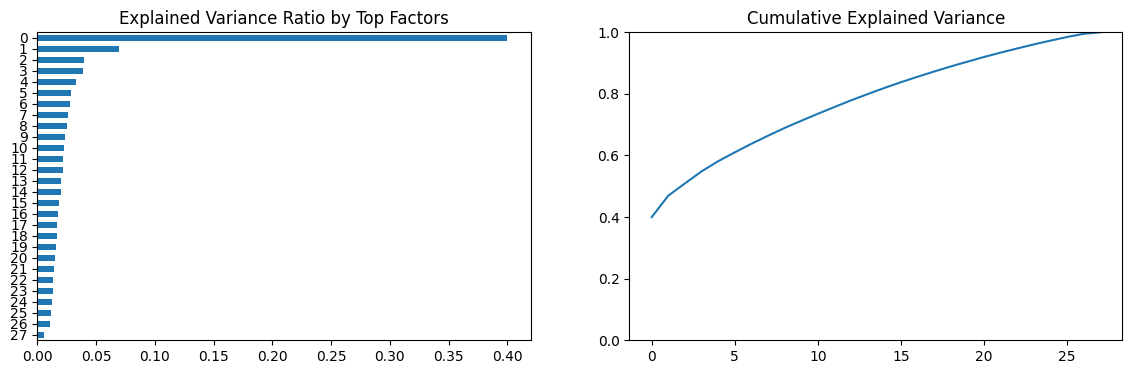

In [107]:
_, axes = plt.subplots(ncols=2, figsize=(14, 4))
Series1 = pd.Series(pca.explained_variance_ratio_).sort_values(ascending=True)
Series2 = pd.Series(np.cumsum(pca.explained_variance_ratio_))
Series1.plot.barh(ax=axes[0], title="Explained Variance Ratio by Top Factors")
Series2.plot(ylim=(0, 1), ax=axes[1], title="Cumulative Explained Variance")
display(Series2)

In [120]:
pcaDF = pd.DataFrame(pca.components_, columns=dataset.columns)
display(pcaDF.head())
display(pcaDF.sum(axis=1))

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
0,0.2158,0.2339,0.1489,0.1907,0.2071,0.1957,0.1838,0.1658,0.2103,0.2045,0.21,0.2036,0.1874,0.1879,0.1722,0.2212,0.1567,0.1636,0.1915,0.1703,0.1825,0.1565,0.2054,0.2228,0.1589,0.1774,0.1709,0.157
1,-0.07082,0.09313,0.2989,-0.02596,0.02642,-0.1485,0.3631,-0.2333,0.08248,-0.1748,0.2066,0.05389,0.2248,0.3249,-0.2977,0.1559,-0.1008,-0.27,0.2347,0.02848,-0.2564,-0.2736,-0.02852,-0.009224,-0.1757,-0.03107,-0.05657,-0.1406
2,-0.09744,-0.2502,0.2892,-0.1408,-0.1493,-0.005133,0.264,0.1761,-0.06561,0.06154,-0.2425,-0.2329,0.1791,0.3137,0.2482,-0.2901,-0.04091,0.2601,0.2601,-0.1427,0.1983,0.1299,-0.1969,-0.1345,-0.09193,0.1477,-0.04509,-0.03606
3,0.02202,0.06179,-0.01223,0.02377,0.1189,0.4401,-0.04053,-0.1717,0.02029,0.3898,0.1154,-0.3204,-0.00898,-0.02998,0.00993,0.07761,-0.276,0.0716,0.04936,-0.1913,0.08098,-0.2535,0.09558,0.02584,0.1296,-0.007292,-0.4406,-0.2621
4,-0.1589,0.2165,-0.08856,-0.2506,-0.2149,-0.2616,-0.005879,-0.1476,-0.003449,-0.2766,0.2867,0.01878,-0.02997,-0.0354,0.1519,0.3442,-0.1504,0.3725,-0.03579,-0.1382,0.3099,-0.03837,0.1766,-0.2523,0.0639,0.1817,0.01167,-0.08198


0        5.252
1      -0.2004
2       0.3658
3      -0.2821
4     -0.03612
5      -0.1496
6      0.09283
7       0.2005
8     -0.09607
9     -0.08982
10    -0.07713
11     -0.1222
12    -0.02778
13     0.07459
14   -0.001331
15     0.05769
16     0.07007
17    -0.07394
18    -0.03775
19     0.01442
20     0.03002
21    -0.08202
22    0.003668
23    -0.05123
24     -0.1251
25     0.02783
26     0.02316
27     0.04768
dtype: float64

In [132]:
# weights = (pcaDF.T / pcaDF.sum(axis=1)).T
weights = pcaDF.div(pcaDF.sum(axis=1), axis=0)
weights.columns = [f"weight_{i}" for i in range(len(pca.components_))]
weights.head()

,weight_0,weight_1,weight_2,weight_3,weight_4,weight_5,weight_6,weight_7,weight_8,weight_9,weight_10,weight_11,weight_12,weight_13,weight_14,weight_15,weight_16,weight_17,weight_18,weight_19,weight_20,weight_21,weight_22,weight_23,weight_24,weight_25,weight_26,weight_27
0,0.04109,0.04453,0.02835,0.0363,0.03942,0.03726,0.03499,0.03157,0.04004,0.03894,0.03999,0.03876,0.03568,0.03578,0.03279,0.04211,0.02984,0.03115,0.03647,0.03243,0.03474,0.02979,0.0391,0.04241,0.03026,0.03379,0.03253,0.02989
1,0.3535,-0.4648,-1.492,0.1296,-0.1319,0.7413,-1.812,1.164,-0.4117,0.8727,-1.031,-0.269,-1.122,-1.622,1.486,-0.7781,0.503,1.348,-1.172,-0.1422,1.28,1.366,0.1423,0.04604,0.8769,0.1551,0.2823,0.7017
2,-0.2664,-0.6841,0.7905,-0.3849,-0.4082,-0.01403,0.7218,0.4814,-0.1794,0.1682,-0.6631,-0.6367,0.4897,0.8576,0.6785,-0.7932,-0.1118,0.7111,0.711,-0.3901,0.5422,0.3551,-0.5383,-0.3677,-0.2513,0.4038,-0.1233,-0.09857
3,-0.07805,-0.2191,0.04335,-0.08426,-0.4216,-1.56,0.1437,0.6087,-0.07195,-1.382,-0.409,1.136,0.03184,0.1063,-0.0352,-0.2752,0.9784,-0.2539,-0.175,0.6784,-0.2871,0.8988,-0.3389,-0.09162,-0.4596,0.02585,1.562,0.9291
4,4.399,-5.994,2.452,6.938,5.948,7.241,0.1627,4.086,0.09547,7.656,-7.937,-0.52,0.8297,0.98,-4.205,-9.528,4.163,-10.31,0.9908,3.825,-8.58,1.062,-4.889,6.985,-1.769,-5.029,-0.3231,2.269


In [123]:
NumComponents = 5
topPortfolios = pcaDF[:NumComponents]
topPortfolios.head()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
0,0.2158,0.2339,0.1489,0.1907,0.2071,0.1957,0.1838,0.1658,0.2103,0.2045,0.21,0.2036,0.1874,0.1879,0.1722,0.2212,0.1567,0.1636,0.1915,0.1703,0.1825,0.1565,0.2054,0.2228,0.1589,0.1774,0.1709,0.157
1,-0.07082,0.09313,0.2989,-0.02596,0.02642,-0.1485,0.3631,-0.2333,0.08248,-0.1748,0.2066,0.05389,0.2248,0.3249,-0.2977,0.1559,-0.1008,-0.27,0.2347,0.02848,-0.2564,-0.2736,-0.02852,-0.009224,-0.1757,-0.03107,-0.05657,-0.1406
2,-0.09744,-0.2502,0.2892,-0.1408,-0.1493,-0.005133,0.264,0.1761,-0.06561,0.06154,-0.2425,-0.2329,0.1791,0.3137,0.2482,-0.2901,-0.04091,0.2601,0.2601,-0.1427,0.1983,0.1299,-0.1969,-0.1345,-0.09193,0.1477,-0.04509,-0.03606
3,0.02202,0.06179,-0.01223,0.02377,0.1189,0.4401,-0.04053,-0.1717,0.02029,0.3898,0.1154,-0.3204,-0.00898,-0.02998,0.00993,0.07761,-0.276,0.0716,0.04936,-0.1913,0.08098,-0.2535,0.09558,0.02584,0.1296,-0.007292,-0.4406,-0.2621
4,-0.1589,0.2165,-0.08856,-0.2506,-0.2149,-0.2616,-0.005879,-0.1476,-0.003449,-0.2766,0.2867,0.01878,-0.02997,-0.0354,0.1519,0.3442,-0.1504,0.3725,-0.03579,-0.1382,0.3099,-0.03837,0.1766,-0.2523,0.0639,0.1817,0.01167,-0.08198


In [133]:
display(topPortfolios.sum(1))
display(topPortfolios.div(topPortfolios.sum(1), axis=0))
display((topPortfolios.T / (topPortfolios.sum(1))).T)

0      5.252
1    -0.2004
2     0.3658
3    -0.2821
4   -0.03612
dtype: float64

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
0,0.04109,0.04453,0.02835,0.0363,0.03942,0.03726,0.03499,0.03157,0.04004,0.03894,0.03999,0.03876,0.03568,0.03578,0.03279,0.04211,0.02984,0.03115,0.03647,0.03243,0.03474,0.02979,0.0391,0.04241,0.03026,0.03379,0.03253,0.02989
1,0.3535,-0.4648,-1.492,0.1296,-0.1319,0.7413,-1.812,1.164,-0.4117,0.8727,-1.031,-0.269,-1.122,-1.622,1.486,-0.7781,0.503,1.348,-1.172,-0.1422,1.28,1.366,0.1423,0.04604,0.8769,0.1551,0.2823,0.7017
2,-0.2664,-0.6841,0.7905,-0.3849,-0.4082,-0.01403,0.7218,0.4814,-0.1794,0.1682,-0.6631,-0.6367,0.4897,0.8576,0.6785,-0.7932,-0.1118,0.7111,0.711,-0.3901,0.5422,0.3551,-0.5383,-0.3677,-0.2513,0.4038,-0.1233,-0.09857
3,-0.07805,-0.2191,0.04335,-0.08426,-0.4216,-1.56,0.1437,0.6087,-0.07195,-1.382,-0.409,1.136,0.03184,0.1063,-0.0352,-0.2752,0.9784,-0.2539,-0.175,0.6784,-0.2871,0.8988,-0.3389,-0.09162,-0.4596,0.02585,1.562,0.9291
4,4.399,-5.994,2.452,6.938,5.948,7.241,0.1627,4.086,0.09547,7.656,-7.937,-0.52,0.8297,0.98,-4.205,-9.528,4.163,-10.31,0.9908,3.825,-8.58,1.062,-4.889,6.985,-1.769,-5.029,-0.3231,2.269


,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
0,0.04109,0.04453,0.02835,0.0363,0.03942,0.03726,0.03499,0.03157,0.04004,0.03894,0.03999,0.03876,0.03568,0.03578,0.03279,0.04211,0.02984,0.03115,0.03647,0.03243,0.03474,0.02979,0.0391,0.04241,0.03026,0.03379,0.03253,0.02989
1,0.3535,-0.4648,-1.492,0.1296,-0.1319,0.7413,-1.812,1.164,-0.4117,0.8727,-1.031,-0.269,-1.122,-1.622,1.486,-0.7781,0.503,1.348,-1.172,-0.1422,1.28,1.366,0.1423,0.04604,0.8769,0.1551,0.2823,0.7017
2,-0.2664,-0.6841,0.7905,-0.3849,-0.4082,-0.01403,0.7218,0.4814,-0.1794,0.1682,-0.6631,-0.6367,0.4897,0.8576,0.6785,-0.7932,-0.1118,0.7111,0.711,-0.3901,0.5422,0.3551,-0.5383,-0.3677,-0.2513,0.4038,-0.1233,-0.09857
3,-0.07805,-0.2191,0.04335,-0.08426,-0.4216,-1.56,0.1437,0.6087,-0.07195,-1.382,-0.409,1.136,0.03184,0.1063,-0.0352,-0.2752,0.9784,-0.2539,-0.175,0.6784,-0.2871,0.8988,-0.3389,-0.09162,-0.4596,0.02585,1.562,0.9291
4,4.399,-5.994,2.452,6.938,5.948,7.241,0.1627,4.086,0.09547,7.656,-7.937,-0.52,0.8297,0.98,-4.205,-9.528,4.163,-10.31,0.9908,3.825,-8.58,1.062,-4.889,6.985,-1.769,-5.029,-0.3231,2.269


,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Portfolio_0,0.04109,0.04453,0.02835,0.0363,0.03942,0.03726,0.03499,0.03157,0.04004,0.03894,0.03999,0.03876,0.03568,0.03578,0.03279,0.04211,0.02984,0.03115,0.03647,0.03243,0.03474,0.02979,0.0391,0.04241,0.03026,0.03379,0.03253,0.02989
Portfolio_1,0.3535,-0.4648,-1.492,0.1296,-0.1319,0.7413,-1.812,1.164,-0.4117,0.8727,-1.031,-0.269,-1.122,-1.622,1.486,-0.7781,0.503,1.348,-1.172,-0.1422,1.28,1.366,0.1423,0.04604,0.8769,0.1551,0.2823,0.7017
Portfolio_2,-0.2664,-0.6841,0.7905,-0.3849,-0.4082,-0.01403,0.7218,0.4814,-0.1794,0.1682,-0.6631,-0.6367,0.4897,0.8576,0.6785,-0.7932,-0.1118,0.7111,0.711,-0.3901,0.5422,0.3551,-0.5383,-0.3677,-0.2513,0.4038,-0.1233,-0.09857
Portfolio_3,-0.07805,-0.2191,0.04335,-0.08426,-0.4216,-1.56,0.1437,0.6087,-0.07195,-1.382,-0.409,1.136,0.03184,0.1063,-0.0352,-0.2752,0.9784,-0.2539,-0.175,0.6784,-0.2871,0.8988,-0.3389,-0.09162,-0.4596,0.02585,1.562,0.9291
Portfolio_4,4.399,-5.994,2.452,6.938,5.948,7.241,0.1627,4.086,0.09547,7.656,-7.937,-0.52,0.8297,0.98,-4.205,-9.528,4.163,-10.31,0.9908,3.825,-8.58,1.062,-4.889,6.985,-1.769,-5.029,-0.3231,2.269


array([12.5, 2.18, 1.24, 1.22, 1.03, 0.898, 0.869, 0.816, 0.789, 0.726, ..., 0.514, 0.486, 0.472, 0.446, 0.418, 0.415, 0.381, 0.369, 0.322,
       0.162])

array([3.54, 1.48, 1.11, 1.1, 1.02, 0.948, 0.932, 0.904, 0.888, 0.852, ..., 0.717, 0.697, 0.687, 0.668, 0.647, 0.644, 0.618, 0.607, 0.567,
       0.403])

<Axes: title={'center': 'Portfolio_4'}>

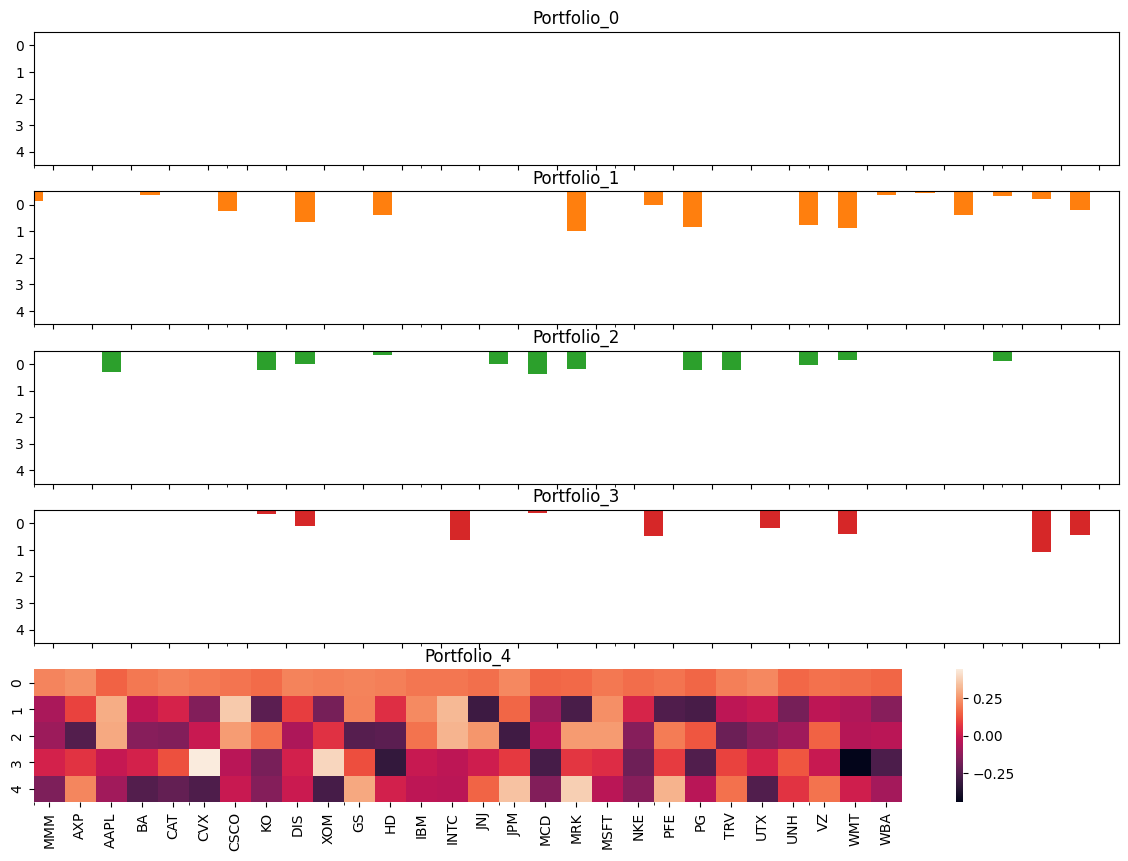

In [143]:
eigen_portfolios = topPortfolios.div(topPortfolios.sum(axis=1), axis=0)
eigen_portfolios.index = [f"Portfolio_{i}" for i in range(NumComponents)]
display(eigen_portfolios)
display(pca.explained_variance_)
display(np.sqrt(pca.explained_variance_))
eigen_portfolios.T.plot.bar(
    subplots=True,
    layout=(int(NumComponents), 1),
    figsize=(14, 10),
    legend=False,
    sharey=True,
    ylim=(-1, 1),
)
sns.heatmap(topPortfolios)